In [11]:
import requests
from maskrcnn_benchmark.data.datasets.utils.load_files import load_labelmap_file

from emma_perception.utils.visualizing_image import SingleImageViz
import PIL.Image as Image
from io import BytesIO
import numpy as np

import os

# sets the correct classmap for the object detector
os.environ["CLASSMAP_TYPE"] = "original"

from emma_perception.constants import OBJECT_CLASSMAP

id2obj = {int(obj_id): obj_label for obj_id, obj_label in OBJECT_CLASSMAP["idx_to_label"].items()}

In [5]:
# Specify the image to use

image_url = (
    "https://production-media.paperswithcode.com/thumbnails/task/task-0000000901-8d3933f5.jpg"
)

response = requests.get(image_url)
image = BytesIO(response.content)
image_array = np.array(Image.open(image))
image.seek(0)

0

In [6]:
url = "http://127.0.0.1:5500/features"
files = {"input_file": image}
response = requests.post(url, files=files)
data = response.json()

In [13]:
data.keys()

dict_keys(['bbox_features', 'bbox_coords', 'bbox_probas', 'cnn_features', 'class_labels'])

In [15]:
from IPython.display import clear_output, display
from IPython.display import Image as DisplayImage

# for visualizing output
def showarray(a, fmt="jpeg"):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    display(DisplayImage(data=f.getvalue()))

In [16]:
image_visualizer = SingleImageViz(image_array, id2obj=id2obj)
boxes = np.array(data["bbox_coords"])
obj_scores = np.array(data["bbox_probas"])
obj_ids = np.argmax(obj_scores, -1)
image_visualizer.draw_boxes(boxes, obj_ids, obj_scores)

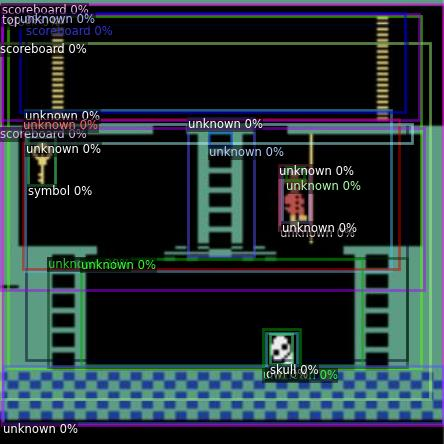

In [17]:
showarray(image_visualizer._get_buffer())